# Movie Reviews Text Classifier

Ian Kollipara

CS 392 Seminar in Data Science

2022.03.19

## Feature Extraction

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("movie.csv")

In [8]:
df = df.rename(columns={"label": "target"})
df

,text,target
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [9]:
df.groupby("target").count()

,text
target,
0,20019
1,19981


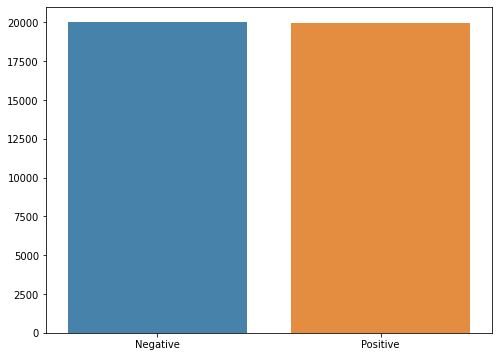

In [10]:
label_counts = df['target'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=["Negative", "Positive"], y=label_counts.values, alpha=0.9)

plt.show()

In [6]:
df['length'] = df['text'].map(lambda t: len(t))
df

,text,target,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983
...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,3111
39996,This movie is an incredible piece of work. It ...,1,291
39997,My wife and I watched this movie because we pl...,0,1092
39998,"When I first watched Flatliners, I was amazed....",1,1045


In [7]:
df.isna().values.any()

False

In [9]:
df.groupby("target")["length"].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,20019.0,1292.536990,942.220087,32.0,705.0,973.0,1571.0,8969.0
1,19981.0,1328.083279,1032.236721,65.0,690.0,972.0,1621.0,13704.0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

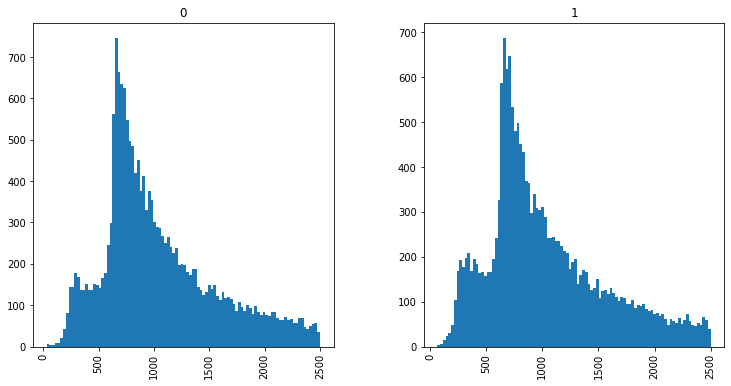

In [11]:
threshold = 2500

df[df["length"] < 2500].hist(column="length", by="target", bins=100, figsize=(12,6))